# Visualize Ohio

In [ ]:
!pip install geopandas

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## shapefile
geodf = gpd.read_file("/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/Data/oh_precincts/oh_2020.shp")
## nicolas run here:
# geodf = gpd.read_file("/content/drive/MyDrive/Precinct results visualization code/Data/oh_precincts/oh_2020.shp")


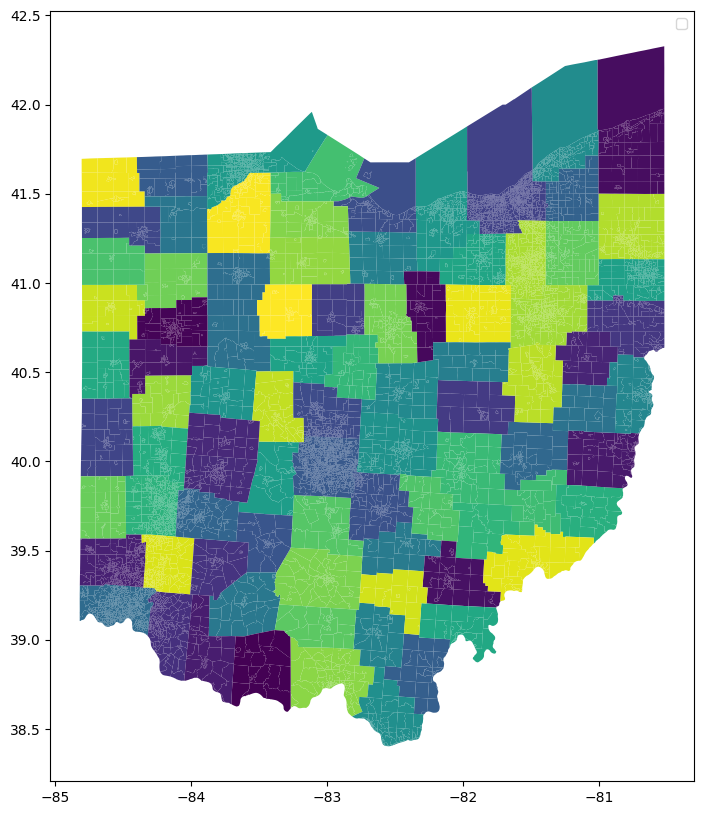

In [4]:
# geodf
geodf.plot(column='COUNTYFP20', legend=True, figsize=(15, 10), categorical=True, cmap='viridis')
plt.legend()
plt.show()

In [5]:
geodf.drop(geodf[geodf['PRECINCT20'] == 'ZZZ'].index, inplace=True)
geodf.reset_index(inplace=True, drop=True)

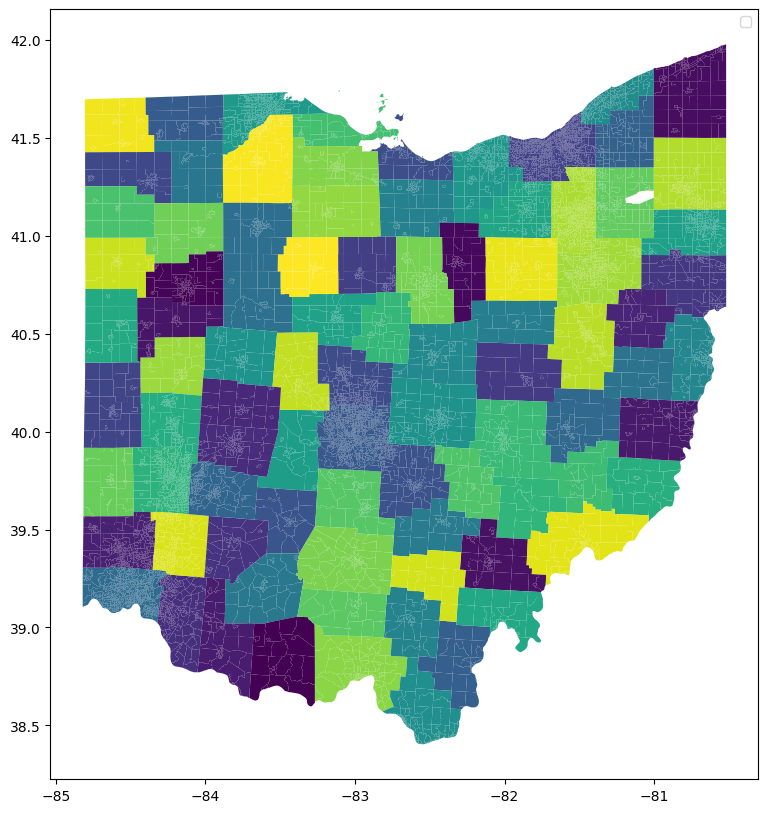

In [6]:
# geodf
geodf.plot(column='COUNTYFP20', legend=True, figsize=(15, 10), categorical=True, cmap='viridis')
plt.legend()
plt.show()

In [7]:
county_fips = pd.read_csv('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/Data/oh_precincts/state_and_county_fips_master.csv')
county_fips = county_fips.loc[county_fips['state'] == 'OH']
county_fips['fips'] = county_fips['fips'].astype(str).str[2:]
county_fips['name'] = county_fips['name'].str[:-7].str.upper()
county_fips_dict = dict(zip(county_fips['fips'], county_fips['name']))

In [8]:
geodf['county'] = [county_fips_dict[fip] for fip in geodf['COUNTYFP20']]
geodf['county_precinct'] = geodf['county']+geodf['PRECINCT20']

In [14]:
counties = gpd.GeoDataFrame()
counties['fips'] = geodf['COUNTYFP20'].unique()
counties['name'] = [county_fips_dict[fip] for fip in counties['fips']]
# counties['name'] = counties['name'].str.upper()

In [15]:
counties

,fips,name
0,009,ATHENS
1,159,UNION
2,017,BUTLER
3,023,CLARK
4,173,WOOD
...,...,...
83,157,TUSCARAWAS
84,107,MERCER
85,081,JEFFERSON
86,057,GREENE


In [16]:
geodf['const'] = 1

In [42]:
merged_geo = []
for c in counties['fips']:
  # print(c)
  # print(geodf[geodf['COUNTYFP20'] == c].dissolve('const')['geometry'][1])
  # if geodf[geodf['COUNTYFP20'] == c].dissolve('const')['geometry'].shape[0] == 1:
  #   merged_geo.append(geodf[geodf['COUNTYFP20'] == c]['geometry'].values)
  # else:
  merged_geo.append(geodf[geodf['COUNTYFP20'] == c].dissolve('const')['geometry'][1])

In [44]:
# merged_geo

In [45]:
counties['geometry'] = merged_geo

In [50]:
counties = counties.set_geometry('geometry')

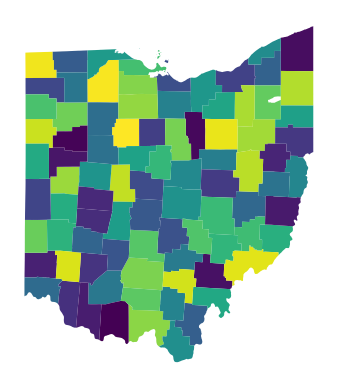

In [51]:
# fig, ax = plt.subplots(1, 1, figsize=(8,12), )
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size="5%", pad=0.1)

ax = counties.plot(column='name' ,legend=False, categorical=True, cmap='viridis',
          #  legend_kwds={"label": "Trump vote share, Wisconsin 2020", "orientation": "horizontal", "shrink": 0.7, "pad": 0.01}, ax=ax,
                           aspect=1.4)#, cax=cax) #

ax.axis('off')
# cb_ax = fig.axes[1]
# cb_ax.tick_params(labelsize=10, labelcolor='black')
# cb_ax.set_label(fontsize=20, labelcolor='black')
# cb_ax.set_label()
# plt.legend(labelcolor='white', fontsize=14)
# plt.legend()
plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/OH_2016_counties.png',
            bbox_inches='tight', transparent = True)
plt.show()

In [52]:
counties['const'] = 0
full_state = counties.dissolve('const')#['geometry']

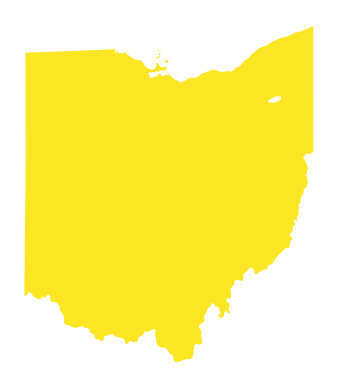

In [58]:
# fig, ax = plt.subplots(1, 1, figsize=(8,12), )
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size="5%", pad=0.1)

ax = full_state.plot(column='name' ,legend=False, categorical=True, cmap='viridis_r',
          #  legend_kwds={"label": "Trump vote share, Wisconsin 2020", "orientation": "horizontal", "shrink": 0.7, "pad": 0.01}, ax=ax,
                           aspect=1.4)#, cax=cax) #

ax.axis('off')
# cb_ax = fig.axes[1]
# cb_ax.tick_params(labelsize=10, labelcolor='black')
# cb_ax.set_label(fontsize=20, labelcolor='black')
# cb_ax.set_label()
# plt.legend(labelcolor='white', fontsize=14)
# plt.legend()
plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/OH_2016.png',
            bbox_inches='tight', transparent = True)
plt.show()

In [59]:
geodf.head(1)

,STATEFP20,COUNTYFP20,VTDST20,PRECINCT20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,geometry,county,county_precinct,const
0,39,009,005ACR,ACR,39009005ACR,ATHENS 2-5,6,7,0,0,"POLYGON ((-82.09632 39.32211, -82.09627 39.322...",ATHENS,ATHENSACR,1


In [69]:
geodf.shape

(8933, 15)

In [67]:
geodf['index'] = [i%10 for i in (range(len(geodf)))]

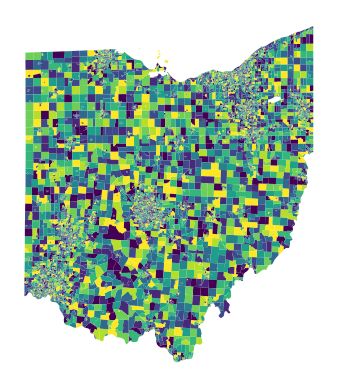

In [68]:
# fig, ax = plt.subplots(1, 1, figsize=(8,12), )
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size="5%", pad=0.1)

ax = geodf.plot(column='index' ,legend=False, categorical=True, cmap='viridis',
          #  legend_kwds={"label": "Trump vote share, Wisconsin 2020", "orientation": "horizontal", "shrink": 0.7, "pad": 0.01}, ax=ax,
                           aspect=1.4)#, cax=cax) #

ax.axis('off')
# cb_ax = fig.axes[1]
# cb_ax.tick_params(labelsize=10, labelcolor='black')
# cb_ax.set_label(fontsize=20, labelcolor='black')
# cb_ax.set_label()
# plt.legend(labelcolor='white', fontsize=14)
# plt.legend()
plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/OH_2016_precinct.png',
            bbox_inches='tight', transparent = True)
plt.show()

# Urbanity


In [ ]:
## how urbanity relates to squareness of the county - are precincts more or less square than the county?

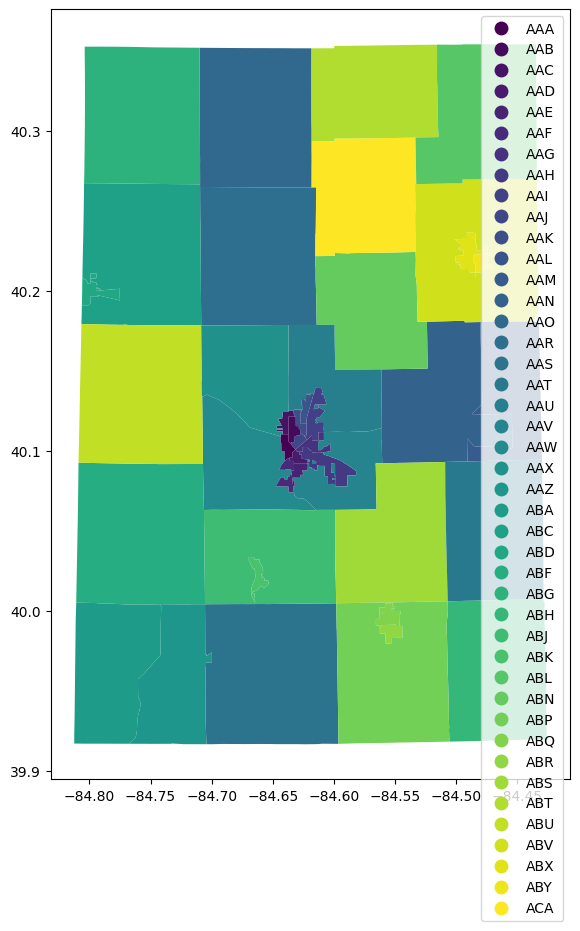

In [ ]:
geodf[geodf['COUNTYFP20'] == '037'].plot(column='PRECINCT20', legend=True,
                                        figsize=(15, 10), categorical=True, cmap='viridis')
# plt.legend()
plt.show()

<Axes: >

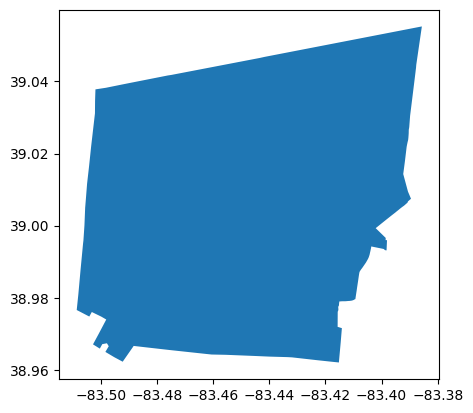

In [ ]:
geodf.loc[geodf['county_precinct'] == 'ADAMSAAA'].plot()
## plot neighbours of it

In [ ]:
gpd.GeoSeries([geodf.loc[0, 'geometry']]).area
#.area()

0    0.000014
dtype: float64

In [ ]:
## add area column
geodf['area'] = [gpd.GeoSeries([geodf.loc[i, 'geometry']]).area[0] for i in range(len(geodf))]


## add perimiter column
geodf['perimiter'] = [gpd.GeoSeries([geodf.loc[i, 'geometry']]).length[0] for i in range(len(geodf))]


## add perimiter/area column - 'rurality/urbanity'
# GitHub Pages
# https://jblindsay.github.io › ghrg › Whitebox › Help
# The perimeter-area ratio is an indicator of polygon shape complexity. Unlike some other shape parameters (e.g. shape complexity index)
geodf['urbanity'] = geodf['perimiter'] / geodf['area']

In [ ]:
## county urbanity
geodf_county_geometry = geodf.dissolve(by='COUNTYFP20')['geometry']


In [ ]:
print(geodf_county_geometry[0])

POLYGON ((-83.705175 38.643223, -83.70517199999999 38.643296, -83.705168 38.643418, -83.705163 38.643539, -83.70510999999999 38.644846, -83.705097 38.64515, -83.705091 38.645295, -83.705039 38.646212999999996, -83.70479499999999 38.650470999999996, -83.704773 38.650935, -83.704715 38.651361, -83.704685 38.651584, -83.704313 38.657982, -83.704229 38.659282, -83.704184 38.660049, -83.704048 38.662468, -83.704033 38.66296, -83.70401799999999 38.663135, -83.704005 38.663772, -83.704002 38.663886999999995, -83.70390499999999 38.667308999999996, -83.70360199999999 38.673409, -83.70340399999999 38.67827, -83.703374 38.678990999999996, -83.70308 38.682865, -83.702973 38.684270999999995, -83.70233999999999 38.691325, -83.70230699999999 38.691700000000004, -83.702303 38.691744, -83.701509 38.700598, -83.701388 38.70196, -83.70119799999999 38.704291, -83.70102299999999 38.706452, -83.700958 38.707269, -83.70094 38.707471999999996, -83.700508 38.712454, -83.700149 38.716591, -83.700048 38.717735, 

In [ ]:
geodf['county_geometry'] = [geodf_county_geometry[row['COUNTYFP20']] for idx, row in geodf.iterrows()]

In [ ]:
geodf.columns

Index(['STATEFP20', 'COUNTYFP20', 'VTDST20', 'PRECINCT20', 'GEOID20', 'NAME20',
       'G20PRERTRU', 'G20PREDBID', 'G20PRELJOR', 'G20PREGHAW', 'geometry',
       'county', 'county_precinct', 'area', 'perimiter', 'urbanity',
       'county_geometry'],
      dtype='object')

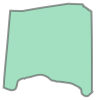

In [ ]:
list(geodf[geodf['county'] == 'ADAMS']['county_geometry'])[0]

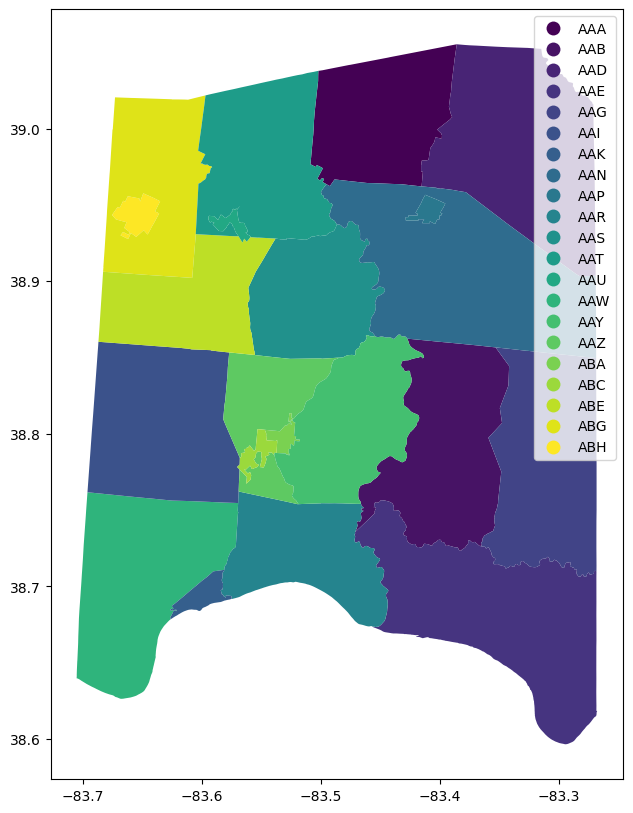

In [ ]:
geodf[geodf['county'] == 'ADAMS'].plot(column='PRECINCT20',  legend=True,
                                        figsize=(15, 10), categorical=False, cmap='viridis')
plt.show()

In [ ]:
geodf.head()

,STATEFP20,COUNTYFP20,VTDST20,PRECINCT20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,geometry,county,county_precinct,area,perimiter,urbanity,county_geometry
0,39,009,005ACR,ACR,39009005ACR,ATHENS 2-5,6,7,0,0,"POLYGON ((-82.09632 39.32211, -82.09627 39.322...",ATHENS,ATHENSACR,0.000014,0.018670,1378.319523,"POLYGON ((-82.079369 39.19381, -82.079894 39.1..."
1,39,159,080ABZ,ABZ,39159080ABZ,MARYSVILLE 2,356,204,14,0,"POLYGON ((-83.36722 40.25455, -83.36717 40.254...",UNION,UNIONABZ,0.000196,0.103984,530.658280,"POLYGON ((-83.50256399999999 40.127821, -83.50..."
2,39,159,080ACC,ACC,39159080ACC,JEROME 6,414,341,6,1,"POLYGON ((-83.23164 40.16109, -83.23154 40.161...",UNION,UNIONACC,0.001309,0.205811,157.174279,"POLYGON ((-83.50256399999999 40.127821, -83.50..."
3,39,159,080ACA,ACA,39159080ACA,MARYSVILLE 4,395,231,4,3,"POLYGON ((-83.38459 40.21995, -83.38390 40.220...",UNION,UNIONACA,0.000098,0.057406,588.097142,"POLYGON ((-83.50256399999999 40.127821, -83.50..."
4,39,159,080ACB,ACB,39159080ACB,MARYSVILLE 15,444,283,10,1,"POLYGON ((-83.39649 40.26222, -83.39638 40.262...",UNION,UNIONACB,0.000110,0.085453,777.835961,"POLYGON ((-83.50256399999999 40.127821, -83.50..."


In [ ]:
## add area column
geodf['county_area'] = [gpd.GeoSeries([geodf.loc[i, 'county_geometry']]).area[0] for i in range(len(geodf))]


## add perimiter column
geodf['county_perimiter'] = [gpd.GeoSeries([geodf.loc[i, 'county_geometry']]).length[0] for i in range(len(geodf))]


## add perimiter/area column - 'rurality/urbanity'
# GitHub Pages
# https://jblindsay.github.io › ghrg › Whitebox › Help
# The perimeter-area ratio is an indicator of polygon shape complexity. Unlike some other shape parameters (e.g. shape complexity index)
geodf['county_urbanity'] = geodf['county_perimiter'] / geodf['county_area']

In [ ]:
geodf['precinct_to_county_urbanity'] = geodf['urbanity'] / geodf['county_urbanity']

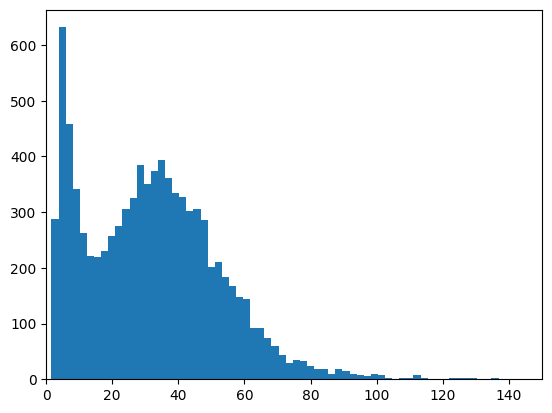

In [ ]:
plt.hist(geodf['precinct_to_county_urbanity'], bins=300)
plt.xlim([0,150])
plt.show()

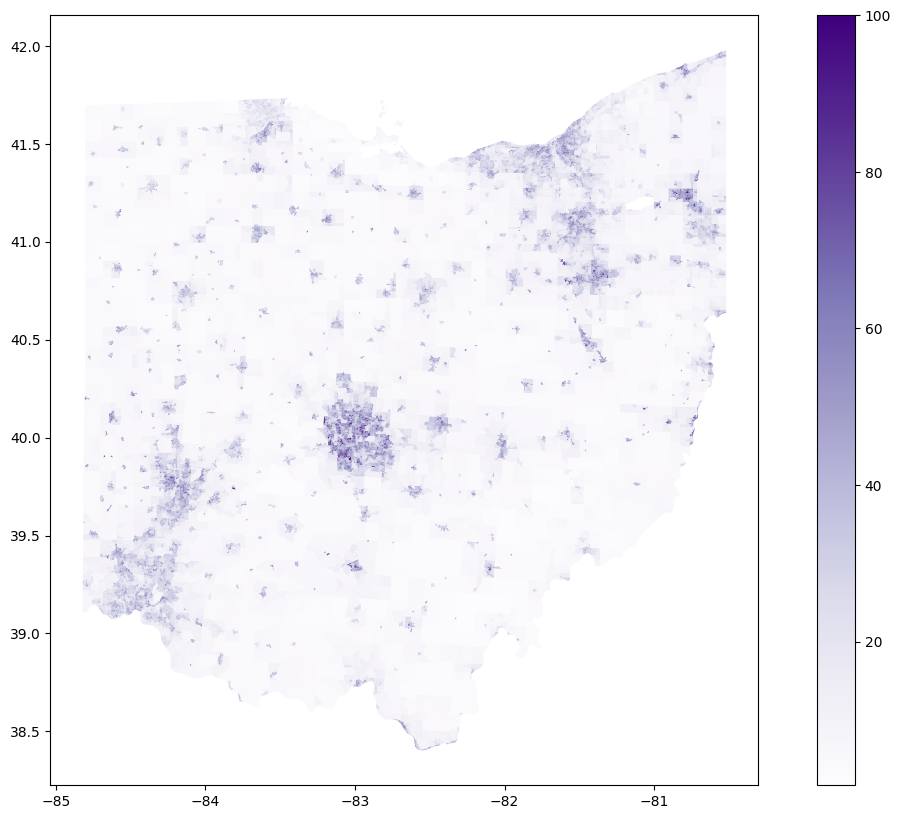

In [ ]:
geodf.plot(column='precinct_to_county_urbanity', legend=True,
                                        figsize=(15, 10), categorical=False, cmap='Purples', vmax=100)
# plt.legend()
plt.show()

In [ ]:
geodf[geodf['urbanity'] >= 8000]#.plot()

,STATEFP20,COUNTYFP20,VTDST20,PRECINCT20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,...,county,county_precinct,area,perimiter,urbanity,county_geometry,county_area,county_perimiter,county_urbanity,precinct_to_county_urbanity
7381,39,061,031BDP,BDP,39061031BDP,COLUMBIA J,0,2,0,0,...,HAMILTON,HAMILTONBDP,1.986900e-07,0.002029,10212.137623,"POLYGON ((-84.628665 39.07604, -84.628934 39.0...",0.111435,1.762995,15.82087,645.48521


<Axes: >

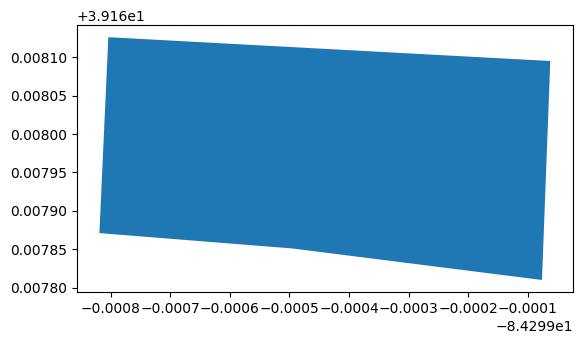

In [ ]:
geodf[geodf['urbanity'] >= 8000].plot()

In [ ]:
geodf['squareness'] = geodf['area'] / (geodf['perimiter']**2)

In [ ]:
1/(4*np.pi)

0.07957747154594767

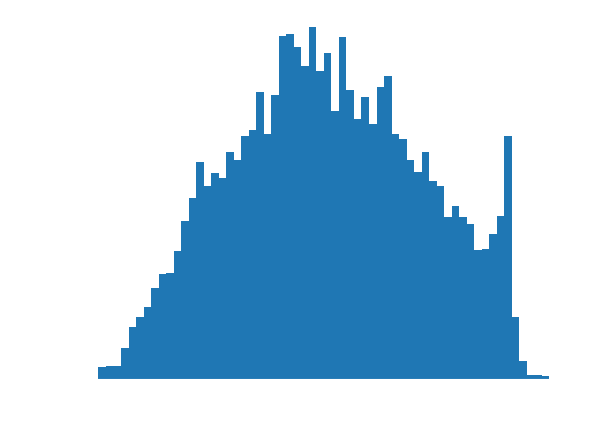

In [ ]:
f, ax = plt.subplots(1,1)

ax.hist(geodf['squareness'], bins=60)
plt.ylabel('Number of precincts', fontsize=14, color='white')
plt.xlabel('Boundary efficiency', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('white')
# ax.spines['left'].set_color('red')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/OH2016_squareness.png', bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
ax.hist(geodf['squareness'], bins=60)


(array([  9.,  10.,  10.,  24.,  41.,  49.,  57.,  72.,  83.,  84., 101.,
        125., 143., 172., 153., 163., 159., 180., 173., 192., 197., 227.,
        194., 225., 272., 273., 263., 248., 279., 244., 258., 212., 271.,
        229., 206., 223., 202., 231., 240., 194., 190., 173., 164., 180.,
        157., 153., 128., 137., 128., 123., 102., 103., 115., 129., 192.,
         49.,  14.,   3.,   3.,   2.]),
 array([0.00140132, 0.00250886, 0.00361639, 0.00472393, 0.00583147,
        0.00693901, 0.00804654, 0.00915408, 0.01026162, 0.01136916,
        0.01247669, 0.01358423, 0.01469177, 0.01579931, 0.01690684,
        0.01801438, 0.01912192, 0.02022946, 0.02133699, 0.02244453,
        0.02355207, 0.02465961, 0.02576714, 0.02687468, 0.02798222,
        0.02908976, 0.03019729, 0.03130483, 0.03241237, 0.03351991,
        0.03462744, 0.03573498, 0.03684252, 0.03795006, 0.03905759,
        0.04016513, 0.04127267, 0.04238021, 0.04348774, 0.04459528,
        0.04570282, 0.04681036, 0.04791789, 0.

<Axes: >

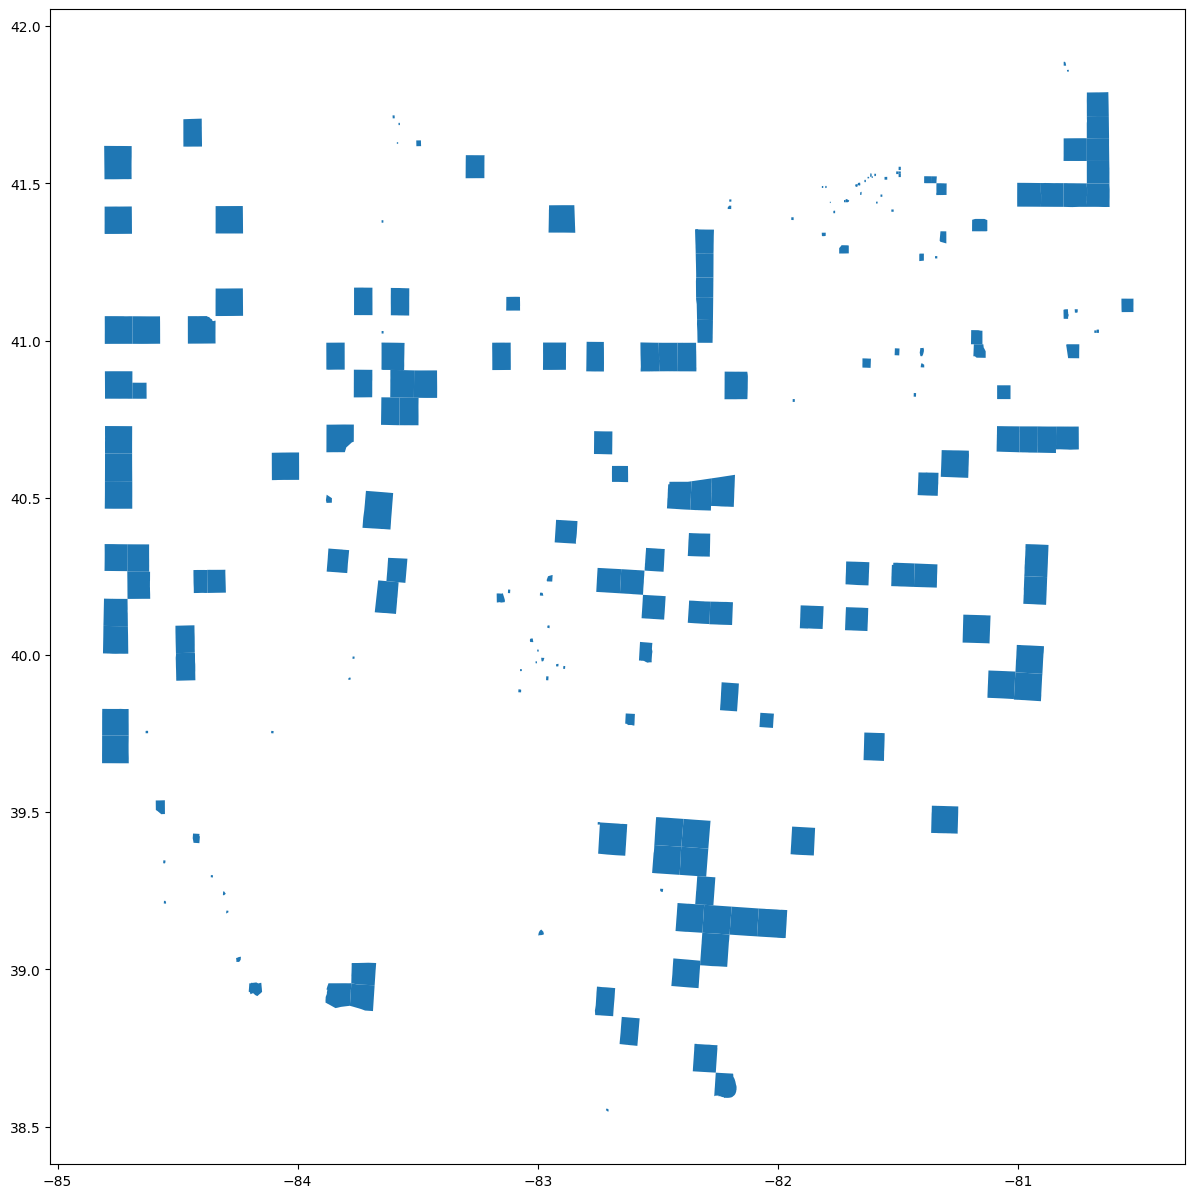

In [ ]:
geodf[(geodf['squareness']>=0.06131588) &(geodf['squareness']<0.06342342)].plot(figsize=(15,15))

In [ ]:
np.max(geodf.squareness)

0.06785357003840416

In [ ]:
geodf[geodf['squareness'] == np.min(geodf.squareness)][['PRECINCT20', 'NAME20', 'county']]

,PRECINCT20,NAME20,county
8921,AZM,JACKSON-A,FRANKLIN


In [ ]:
geodf[geodf['squareness'] == np.max(geodf.squareness)][['PRECINCT20', 'NAME20', 'county']]

,PRECINCT20,NAME20,county
7231,ANI,COLS 61-A,FRANKLIN


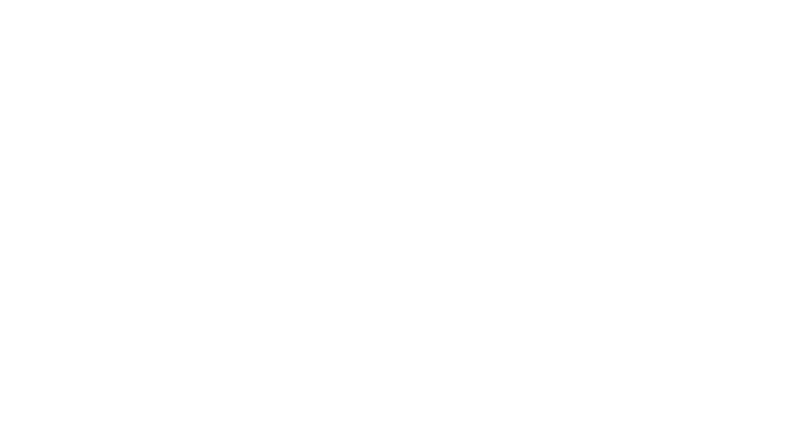

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 10), )
ax = geodf[geodf['squareness'] == np.min(geodf.squareness)].plot(color='white', figsize=(10, 10) )
ax.axis('off')
# cb_ax = fig.axes[1]
# cb_ax.tick_params(labelsize=14, labelcolor='white')
plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/least_efficient_boundary.png', bbox_inches='tight', transparent = True)
plt.show()

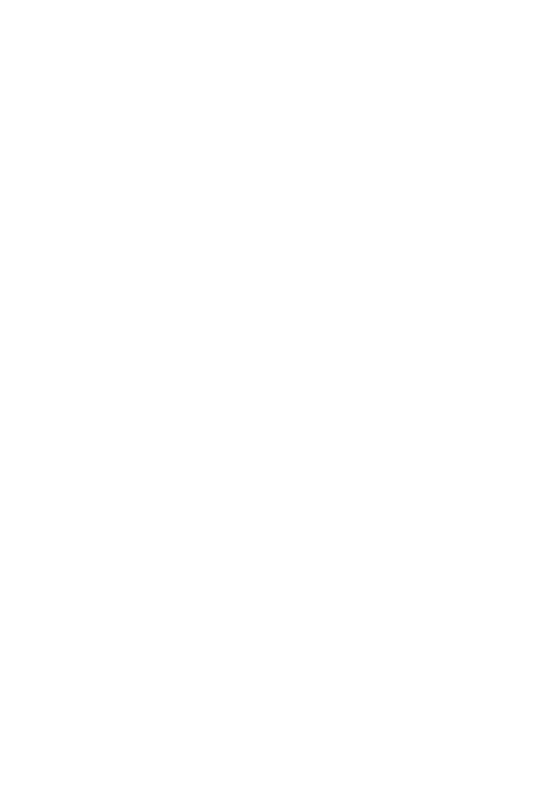

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 10), )
# ax = geodf.plot(column='general_trump_vote_share', legend=True, categorical=False, cmap='RdBu_r', )
#           #  legend_kwds={"label": "Trump vote share, Ohio 2016", "orientation": "horizontal", "shrink": 0.7, "pad": 0.01}, ax=ax )#, cax=cax) #
ax = geodf[geodf['squareness'] == np.max(geodf.squareness)].plot(color='white', figsize=(10, 10) )
ax.axis('off')
# cb_ax = fig.axes[1]
# cb_ax.tick_params(labelsize=14, labelcolor='white')
plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/most_efficient_boundary.png', bbox_inches='tight', transparent = True)
plt.show()

<Axes: >

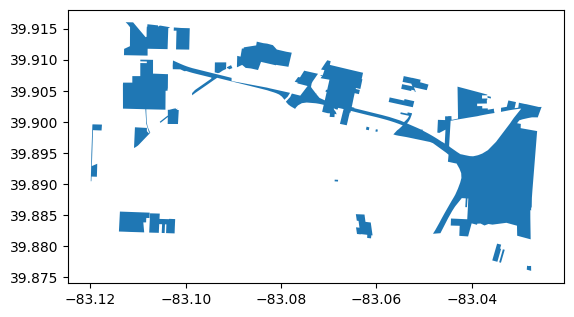

In [ ]:

geodf[geodf['squareness'] == np.min(geodf.squareness)].plot()

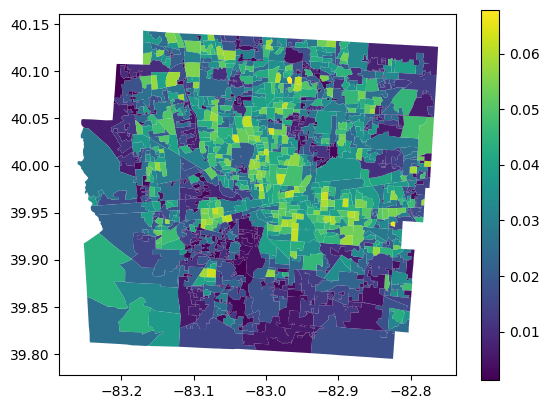

In [ ]:
geodf[geodf['county'] == 'FRANKLIN'].plot(column='squareness', legend=True)
plt.show()

In [ ]:
geodf[geodf['squareness']>0.0678]['county']

7231    FRANKLIN
Name: county, dtype: object

<Axes: >

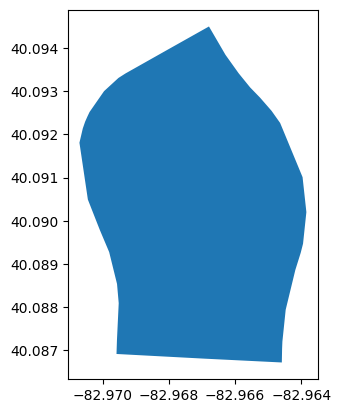

In [ ]:
geodf[geodf['squareness']>0.0678].plot()

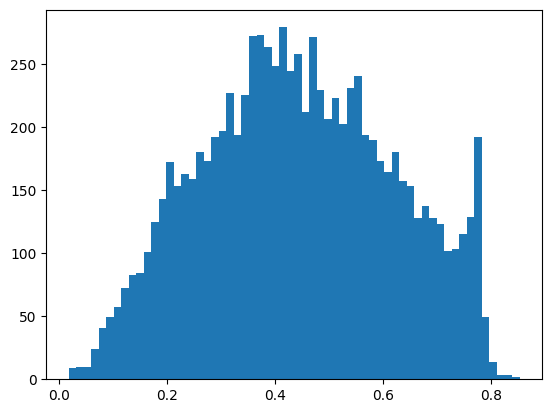

In [ ]:
f, ax = plt.subplots(1,1)

ax.hist(geodf['squareness']*(4*np.pi), bins=60)
# plt.ylabel('Number of precincts', fontsize=14, color='white')
# plt.xlabel('Boundary efficiency', fontsize=14, color='white')
# plt.xticks(fontsize=12, color='white')
# plt.yticks(fontsize=12, color='white')
# ax.spines[['right', 'top']].set_visible(False)
# ax.spines[['left', 'bottom']].set_color('white')
# # ax.spines['left'].set_color('red')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/OH2016_squareness_to1.png', bbox_inches='tight', transparent=True)
plt.show()

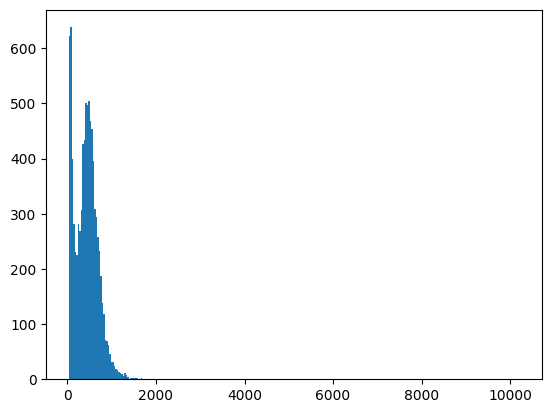

In [ ]:
f, ax = plt.subplots(1,1)

ax.hist(geodf['urbanity'], bins=300)
# plt.xlim([0,3000])
# plt.ylabel('Number of precincts', fontsize=14, color='white')
# plt.xlabel('Urbanity', fontsize=14, color='white')
# plt.xticks(fontsize=12, color='white')
# plt.yticks(fontsize=12, color='white')
# ax.spines[['right', 'top']].set_visible(False)
# ax.spines[['left', 'bottom']].set_color('white')
# # ax.spines['left'].set_color('red')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
# plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/OH2016_urbanity.png', bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
geodf[geodf['county_precinct'] == 'FRANKLINBBV']

,STATEFP20,COUNTYFP20,VTDST20,PRECINCT20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,...,county_precinct,area,perimiter,urbanity,county_geometry,county_area,county_perimiter,county_urbanity,precinct_to_county_urbanity,squareness
8920,39,049,025BBV,BBV,39049025BBV,WASHINGTON-A,295,199,7,0,...,FRANKLINBBV,0.000703,0.655385,932.48155,"POLYGON ((-83.16793799999999 39.808735, -83.16...",0.148431,1.707453,11.503384,81.061501,0.001636


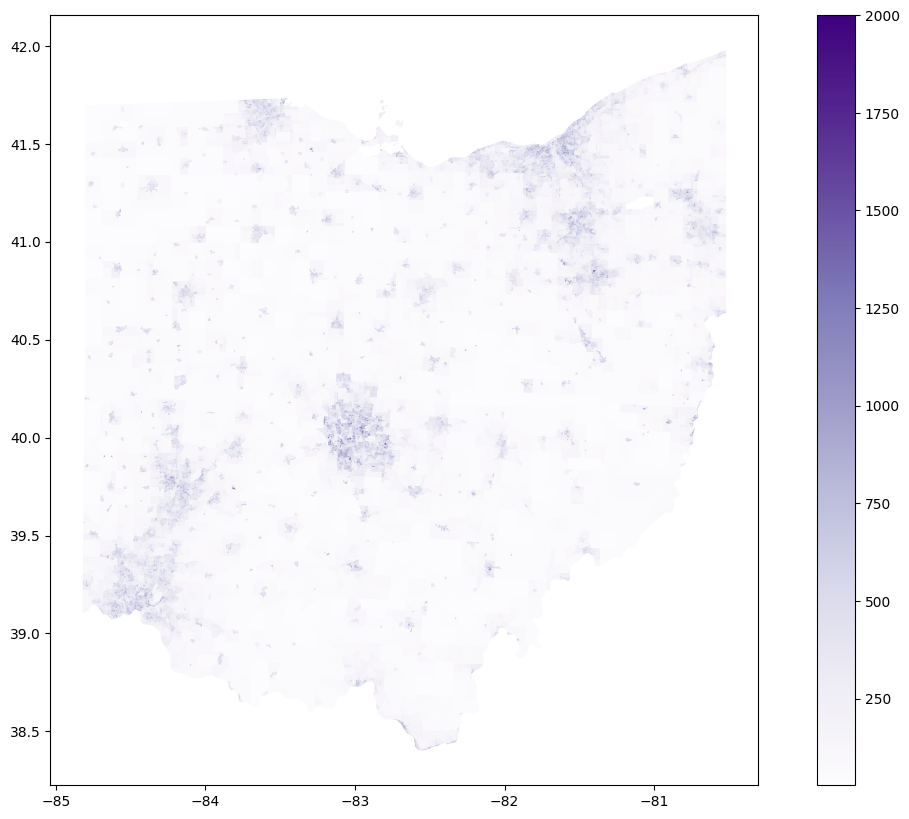

In [ ]:
geodf.plot(column='urbanity', legend=True,
                                        figsize=(15, 10), categorical=False, cmap='Purples', vmax=2000)
# plt.legend()
plt.show()

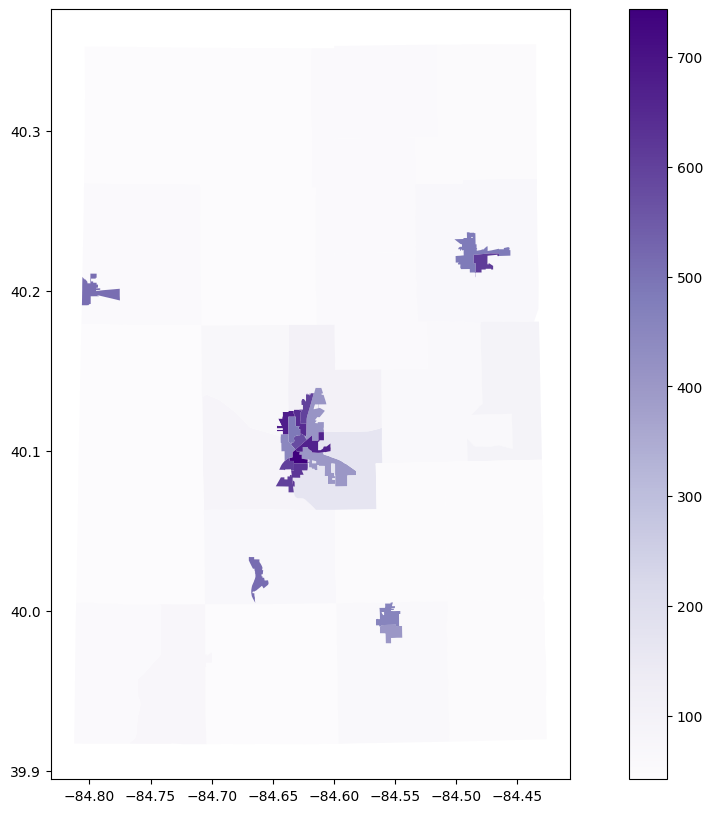

In [ ]:
geodf[geodf['COUNTYFP20'] == '037'].plot(column='urbanity', legend=True,
                                        figsize=(15, 10), categorical=False, cmap='Purples')
plt.show()

In [ ]:
# geodf.to_file("/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/Data/oh_precincts/oh_2020_with_countyprecinct.shp")


# Ohio results

In [ ]:
oh_primary = pd.read_csv("/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/Data/primary_OH2016.csv", index_col=0)

In [ ]:
oh_general = pd.read_csv("/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/Data/general_OH2016.csv", index_col=0)

In [ ]:
oh_primary.head()

,precinct,party,candidate,votes,vote share,county_precinct
0,AAA,DEM,CLINTON,27,0.000953,ADAMSAAA
1,AAB,DEM,CLINTON,36,0.001094,ADAMSAAB
2,AAD,DEM,CLINTON,39,0.002012,ADAMSAAD
3,AAE,DEM,CLINTON,35,0.004588,ADAMSAAE
4,AAG,DEM,CLINTON,22,0.001941,ADAMSAAG


In [ ]:
## create correct vote_share
total_votes_per_precinct_per_party = oh_primary.groupby(['county_precinct', 'party']).sum()['votes']
print(total_votes_per_precinct_per_party.head())
print(total_votes_per_precinct_per_party['ADAMSAAA']['DEM'])#(total_votes_per_precinct_per_party['county_precint']=='ADAMSAAA')&]

oh_primary['party_vote_share'] = [row['votes']/(total_votes_per_precinct_per_party[row['county_precinct']][row['party']]) for idx, row in oh_primary.iterrows()]

<ipython-input-22-c0b96ae54143>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_votes_per_precinct_per_party = oh_primary.groupby(['county_precinct', 'party']).sum()['votes']


county_precinct  party
ADAMSAAA         DEM       54
                 REP      328
ADAMSAAB         DEM       64
                 REP      244
ADAMSAAD         DEM       73
Name: votes, dtype: int64
54


<ipython-input-22-c0b96ae54143>:6: RuntimeWarning: invalid value encountered in long_scalars
  oh_primary['party_vote_share'] = [row['votes']/(total_votes_per_precinct_per_party[row['county_precinct']][row['party']]) for idx, row in oh_primary.iterrows()]


In [ ]:
## votes per person
oh_primary.groupby(['party','candidate']).sum()['votes']

<ipython-input-23-3252cd45e2a0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  oh_primary.groupby(['party','candidate']).sum()['votes']


party  candidate
DEM    CLINTON      696681
       LA FUENTE      9402
       SANDERS      535395
REP    BUSH           5398
       CARSON        14351
       CHRISTIE       2430
       CRUZ         264640
       FIORINA        2112
       HUCKABEE       4941
       KASICH       933886
       RUBIO         46478
       SANTORUM       1320
       TRUMP        713404
Name: votes, dtype: int64

In [ ]:
# plot dem turnout v rep turnout


In [ ]:
candidate_names = list(oh_primary['candidate'].unique())
print(candidate_names)
oh_primary_dict = {}
for c in candidate_names:
  oh_primary_dict[c] = oh_primary[oh_primary['candidate'] == c]
  print(oh_primary_dict[c].shape)

['CLINTON', 'LA FUENTE', 'SANDERS', 'BUSH', 'CARSON', 'CHRISTIE', 'CRUZ', 'FIORINA', 'HUCKABEE', 'KASICH', 'RUBIO', 'SANTORUM', 'TRUMP']
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)
(8887, 7)


In [ ]:
## add column to geodf
for c in candidate_names:
  print(c)
  c_share = []
  for prec in geodf['county_precinct']:
    if prec in list(oh_primary_dict[c]['county_precinct']):
      c_share.append(oh_primary_dict[c].loc[oh_primary_dict[c]['county_precinct']==prec, 'party_vote_share'].values[0])
    else:
      c_share.append(np.nan)
  geodf[str(c)+'_vote_share'] = c_share


CLINTON
LA FUENTE
SANDERS
BUSH
CARSON
CHRISTIE
CRUZ
FIORINA
HUCKABEE
KASICH
RUBIO
SANTORUM
TRUMP


In [ ]:
geodf.head()

,STATEFP20,COUNTYFP20,VTDST20,PRECINCT20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,...,BUSH_vote_share,CARSON_vote_share,CHRISTIE_vote_share,CRUZ_vote_share,FIORINA_vote_share,HUCKABEE_vote_share,KASICH_vote_share,RUBIO_vote_share,SANTORUM_vote_share,TRUMP_vote_share
0,39,009,005ACR,ACR,39009005ACR,ATHENS 2-5,6,7,0,0,...,0.0,0.02,0.0,0.12,0.0,0.0,0.46,0.14,0.0,0.26
1,39,159,080ABZ,ABZ,39159080ABZ,MARYSVILLE 2,356,204,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39,159,080ACC,ACC,39159080ACC,JEROME 6,414,341,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,159,080ACA,ACA,39159080ACA,MARYSVILLE 4,395,231,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39,159,080ACB,ACB,39159080ACB,MARYSVILLE 15,444,283,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
geodf.CARSON_vote_share.isna().sum()

130

In [ ]:
# geodf
# geodf.plot(column='BUSH_vote_share', legend=True, figsize=(15, 10), categorical=False, cmap='viridis')
# plt.legend()
# plt.show()

In [ ]:
# geodf
# geodf.plot(column='CLINTON_vote_share', legend=True, figsize=(15, 10), categorical=False, cmap='viridis')
# plt.legend()
# plt.show()

In [ ]:
# geodf.plot(column='TRUMP_vote_share', legend=True, figsize=(15, 10), categorical=False, cmap='viridis', label='Trump primary vote share')
# # plt.savefig('OH_trump_vote_share_primary.png', bbox_inches='tight')
# plt.show()

In [ ]:
# geodf
# geodf.plot(column='KASICH_vote_share', legend=True, figsize=(15, 10), categorical=False, cmap='viridis')
# plt.legend()
# plt.show()

In [ ]:
# geodf
# geodf.plot(column='KASICH_vote_share', legend=True, figsize=(15, 10), categorical=False, cmap='viridis')
# plt.legend()
# plt.show()

In [ ]:
## network degree
## does degree tell us anything about how urban/rural somewhere is?
## can we look into gerrymandering revealed in the network?

In [ ]:
## create correct vote_share
total_votes_per_precinct_general = oh_general.groupby(['county_precinct']).sum()['votes']
print(total_votes_per_precinct_general.head())
print(total_votes_per_precinct_general['ADAMSAAA'])#(total_votes_per_precinct_per_party['county_precint']=='ADAMSAAA')&]
print(total_votes_per_precinct_general['CLERMONTAIC'])
print(oh_general[oh_general['county_precinct'] == 'CLERMONTAIC'])
oh_general['vote_share'] = [row['votes']/(total_votes_per_precinct_general[row['county_precinct']]) for idx, row in oh_general.iterrows()]

<ipython-input-32-4b949a0b3afa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_votes_per_precinct_general = oh_general.groupby(['county_precinct']).sum()['votes']


county_precinct
ADAMSAAA    644
ADAMSAAB    494
ADAMSAAD    511
ADAMSAAE    255
ADAMSAAG    341
Name: votes, dtype: int64
644
446
     precinct party candidate  votes  vote share county_precinct
1046      AIC   REP     TRUMP    304    0.011398     CLERMONTAIC
1046      AIC   DEM   CLINTON    128    0.003179     CLERMONTAIC
1046      AIC   IND   JOHNSON     11    0.000578     CLERMONTAIC
1046      AIC   GRE     STEIN      3    0.000128     CLERMONTAIC


In [ ]:
oh_general.head()

,precinct,party,candidate,votes,vote share,county_precinct,vote_share
0,AAA,REP,TRUMP,532,0.011257,ADAMSAAA,0.826087
1,AAB,REP,TRUMP,390,0.008147,ADAMSAAB,0.789474
2,AAD,REP,TRUMP,408,0.009882,ADAMSAAD,0.798434
3,AAE,REP,TRUMP,176,0.005163,ADAMSAAE,0.690196
4,AAG,REP,TRUMP,258,0.002920,ADAMSAAG,0.756598


In [ ]:
general_trump_share = []
for prec in geodf['county_precinct']:
  if prec in list(oh_general['county_precinct']):
    general_trump_share.append(oh_general.loc[(oh_general['county_precinct']==prec)&(oh_general['candidate']=='TRUMP'), 'vote_share'].values[0])
  else:
    general_trump_share.append(np.nan)
geodf['general_trump_vote_share'] = general_trump_share

In [ ]:
geodf.head()

,STATEFP20,COUNTYFP20,VTDST20,PRECINCT20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,...,CARSON_vote_share,CHRISTIE_vote_share,CRUZ_vote_share,FIORINA_vote_share,HUCKABEE_vote_share,KASICH_vote_share,RUBIO_vote_share,SANTORUM_vote_share,TRUMP_vote_share,general_trump_vote_share
0,39,009,005ACR,ACR,39009005ACR,ATHENS 2-5,6,7,0,0,...,0.02,0.0,0.12,0.0,0.0,0.46,0.14,0.0,0.26,0.306686
1,39,159,080ABZ,ABZ,39159080ABZ,MARYSVILLE 2,356,204,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39,159,080ACC,ACC,39159080ACC,JEROME 6,414,341,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,39,159,080ACA,ACA,39159080ACA,MARYSVILLE 4,395,231,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39,159,080ACB,ACB,39159080ACB,MARYSVILLE 15,444,283,10,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


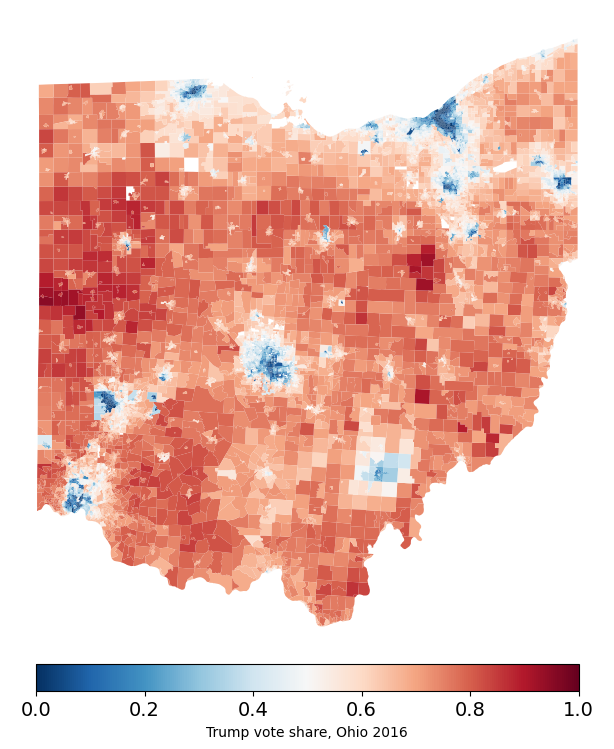

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), )
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("bottom", size="5%", pad=0.1)

ax = geodf.plot(column='general_trump_vote_share', legend=True, categorical=False, cmap='RdBu_r',
           legend_kwds={"label": "Trump vote share, Ohio 2016", "orientation": "horizontal", "shrink": 0.7, "pad": 0.01}, ax=ax )#, cax=cax) #

ax.axis('off')
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=14, labelcolor='black')
# cb_ax.set_label(fontsize=20, labelcolor='black')
# cb_ax.set_label()
# plt.legend(labelcolor='white', fontsize=14)
# plt.legend()
plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/OH_2016_Trump_vote_share.png', bbox_inches='tight', transparent = True)
plt.show()

# Random

In [ ]:
geodf.columns

In [ ]:
## add general total votes and primary total votes

In [ ]:
plt.scatter(geodf['general_trump_vote_share'], geodf['urbanity'], alpha=0.5, )
plt.xlabel('trump vote share')
plt.ylabel('urbanity')
plt.ylim([0,2000])
plt.show()

In [ ]:
import networkx as nx

In [ ]:
G = nx.Graph()
G.add_nodes_from(geodf["county_precinct"])
for index, data in geodf.iterrows():
    i = data.county_precinct
    # get 'not disjoint' countries
    neighbors = geodf[~geodf.geometry.disjoint(data.geometry)].county_precinct.tolist()
    # remove own name of the county from the list
    edges = [(i, name) for name in neighbors if data.county_precinct != name]
    G.add_edges_from(edges)


In [ ]:
precinct = []
deg = []
for p, d in G.degree():
    precinct.append(p)
    deg.append(d)
deg = pd.DataFrame(deg, index=precinct, columns=["degree"])
deg

,degree
ATHENSACR,3
UNIONABZ,3
UNIONACC,8
UNIONACA,4
UNIONACB,4
...,...
FRANKLINAZR,13
WARRENAGD,6
SUMMITAEL,6
SUMMITAVS,9


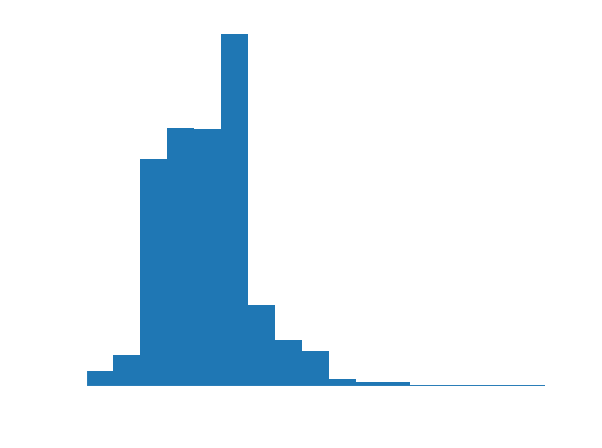

In [ ]:
f, ax = plt.subplots(1,1)

ax.hist(deg, bins=25)
plt.xlim([0,25])
plt.ylabel('Number of precincts', fontsize=14, color='white')
plt.xlabel('Degree', fontsize=14, color='white')
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('white')
# ax.spines['left'].set_color('red')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
plt.savefig('/content/drive/MyDrive/MRC 5: Forecasting Elections/Precinct results visualization code/OH2016_network_degree.png', bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
np.array(str(geodf.loc[10, 'geometry'])[14:-2].replace(',', '').split()).reshape(-1,2).astype(float).tolist()

ValueError: ignored

In [ ]:
## currently can't do multiploygons!

In [ ]:
geodf['geom_type'] = [str(geodf.loc[i, 'geometry']).split('(')[0] for i in geodf.index]
geodf.head()

,STATEFP20,COUNTYFP20,VTDST20,PRECINCT20,GEOID20,NAME20,G20PRERTRU,G20PREDBID,G20PRELJOR,G20PREGHAW,geometry,county,county_precinct,area,perimiter,urbanity,geom_type
0,39,009,005ACR,ACR,39009005ACR,ATHENS 2-5,6,7,0,0,"POLYGON ((-82.09632 39.32211, -82.09627 39.322...",ATHENS,ATHENSACR,0.000014,0.018670,1378.319523,POLYGON
1,39,159,080ABZ,ABZ,39159080ABZ,MARYSVILLE 2,356,204,14,0,"POLYGON ((-83.36722 40.25455, -83.36717 40.254...",UNION,UNIONABZ,0.000196,0.103984,530.658280,POLYGON
2,39,159,080ACC,ACC,39159080ACC,JEROME 6,414,341,6,1,"POLYGON ((-83.23164 40.16109, -83.23154 40.161...",UNION,UNIONACC,0.001309,0.205811,157.174279,POLYGON
3,39,159,080ACA,ACA,39159080ACA,MARYSVILLE 4,395,231,4,3,"POLYGON ((-83.38459 40.21995, -83.38390 40.220...",UNION,UNIONACA,0.000098,0.057406,588.097142,POLYGON
4,39,159,080ACB,ACB,39159080ACB,MARYSVILLE 15,444,283,10,1,"POLYGON ((-83.39649 40.26222, -83.39638 40.262...",UNION,UNIONACB,0.000110,0.085453,777.835961,POLYGON


In [ ]:
for idx, row in geodf.iterrows():
  if idx == 25:
    print(row['geom_type'],)# row['geometry'])
  # if row['geom_type'] == 'POLYGON ':
    # print(idx)
    # print(idx, np.array(str(row['geometry'])[14:-2].replace(',', '').split()).reshape(-1,2).astype(float).tolist() )
  else:
    print(idx, np.nan)

Streaming output truncated to the last 5000 lines.
3933 nan
3934 nan
3935 nan
3936 nan
3937 nan
3938 nan
3939 nan
3940 nan
3941 nan
3942 nan
3943 nan
3944 nan
3945 nan
3946 nan
3947 nan
3948 nan
3949 nan
3950 nan
3951 nan
3952 nan
3953 nan
3954 nan
3955 nan
3956 nan
3957 nan
3958 nan
3959 nan
3960 nan
3961 nan
3962 nan
3963 nan
3964 nan
3965 nan
3966 nan
3967 nan
3968 nan
3969 nan
3970 nan
3971 nan
3972 nan
3973 nan
3974 nan
3975 nan
3976 nan
3977 nan
3978 nan
3979 nan
3980 nan
3981 nan
3982 nan
3983 nan
3984 nan
3985 nan
3986 nan
3987 nan
3988 nan
3989 nan
3990 nan
3991 nan
3992 nan
3993 nan
3994 nan
3995 nan
3996 nan
3997 nan
3998 nan
3999 nan
4000 nan
4001 nan
4002 nan
4003 nan
4004 nan
4005 nan
4006 nan
4007 nan
4008 nan
4009 nan
4010 nan
4011 nan
4012 nan
4013 nan
4014 nan
4015 nan
4016 nan
4017 nan
4018 nan
4019 nan
4020 nan
4021 nan
4022 nan
4023 nan
4024 nan
4025 nan
4026 nan
4027 nan
4028 nan
4029 nan
4030 nan
4031 nan
4032 nan
4033 nan
4034 nan
4035 nan
4036 nan
4037 nan
4038

In [ ]:
geodf['geometry_list'] = [np.array(str(row['geometry'])[14:-2].replace(',', '').split()).reshape(-1,2).astype(float).tolist() if not row['geom_type']=='MULTIPOLYGON'
                          else np.nan for idx, row in geodf.iterrows()]

ValueError: ignored

In [ ]:
oh_json = {'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': poly, 'coordinates': [[[[]]]] }}]}

In [ ]:
geojson

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-73.6363215300962, 45.5759177646435],
       [-73.6362833815582, 45.5758266113331],
       [-73.6446417578686, 45.5658132919643],
       [-73.6453511352974, 45.5647725775888],
       [-73.648867564748, 45.5586898267402],
       [-73.6513170845065, 45.5545659435652],
       [-73.6515658357324, 45.5554439857955],
       [-73.6660837831645, 45.5596724837829],
       [-73.6706609041685, 45.5610978251999],
       [-73.6676019919116, 45.5632340862888],
       [-73.6645385824068, 45.5642716484367],
       [-73.663663123697, 45.5654269638586],
       [-73.663336397858, 45.5666288247853],
       [-73.6637764768649, 45.5678900619231],
       [-73.6625073244826, 45.5688479494114],
       [-73.6624620526633, 45.5708304456346],
       [-73.6620201425015, 45.5713925326191],
       [-73.6616100197742, 45.5737924780218],
       [-73.6612199500215, 45.5747171555678],
       [-7

In [ ]:
df = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth(df, geojson=geojson, color="winner",
                    locations="district", featureidkey="properties.district",
                    projection="mercator", hover_data=["Bergeron", "Coderre", "Joly"]
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
